# **Basic lecture: Single-fidelity 예측 모델 (Kriging) 실습**


---


By Mingyu Lee and Ikjin Lee

http://idol.kaist.ac.kr/

mglee91@kaist.ac.kr

https://github.com/MingyuLee91

IDOL Lab at KAIST



---

### **< Source papers >**

* Le Gratiet, L. (2013). Multi-fidelity Gaussian process regression for computer experiments (Doctoral dissertation, Université Paris-Diderot-Paris VII).

* **Lee, M.**, Jung, Y., Choi, J., & Lee, I. (2022). A reanalysis-based multi-fidelity (RBMF) surrogate framework for efficient structural optimization. Computers & Structures, 273, 106895.
* **Lee, M.**, Noh, Y., & Lee, I. (2024). A novel sampling method for adaptive gradient-enhanced Kriging. Computer Methods in Applied Mechanics and Engineering, 418, 116456.


Original source codes from https://github.com/SMTorg/SMT

Modified version by Mingyu Lee

---


### **< Contents >**

1) Optimization example

**2) One-dimensional example (Kriging)**

 3) One-dimensional example (Co-Kriging)

 4) Engineering application (Kriging)

 5) Engineering application (Co-Kriging)

## **▣ 대리 모델 기반 최적화를 사용하는 이유?**

* 만들어진 대리 모델은 시뮬레이션 모델이 아니므로 출력 값을 얻는데 계산 시간이 많이 소요되지 않는다.
* 따라서, 한번 대리 모델을 만들어 놓으면, 최적화를 수행하는 과정이 크게 부담스럽지 않다.

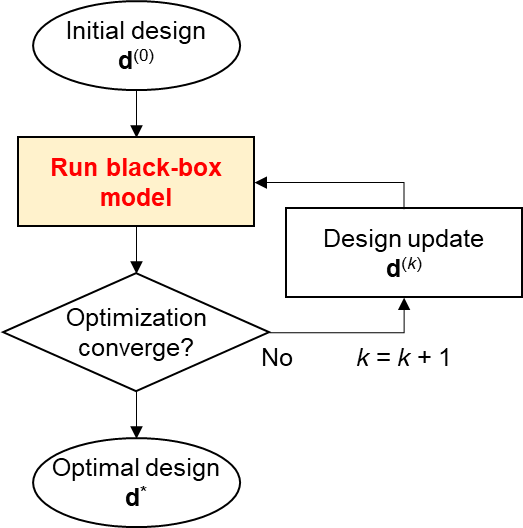

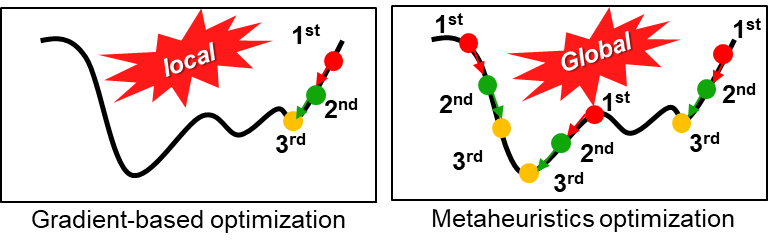

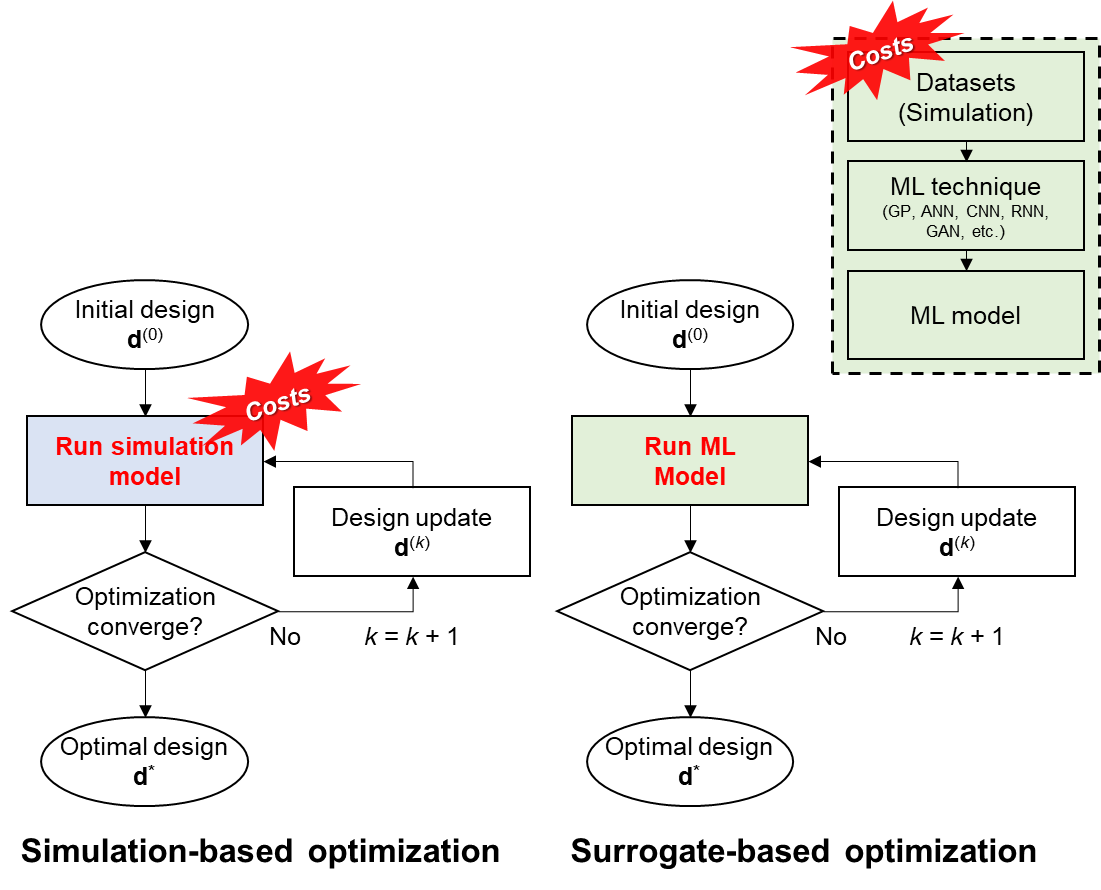

## **▣ 대리 모델링 정의**

* 입력과 출력 관계를 수학적으로 모델링하는 과정
* 대리 모델 = 예측 모델 = 근사 모델 = Data-driven model = Surrogate model = Metamodel = Emulation

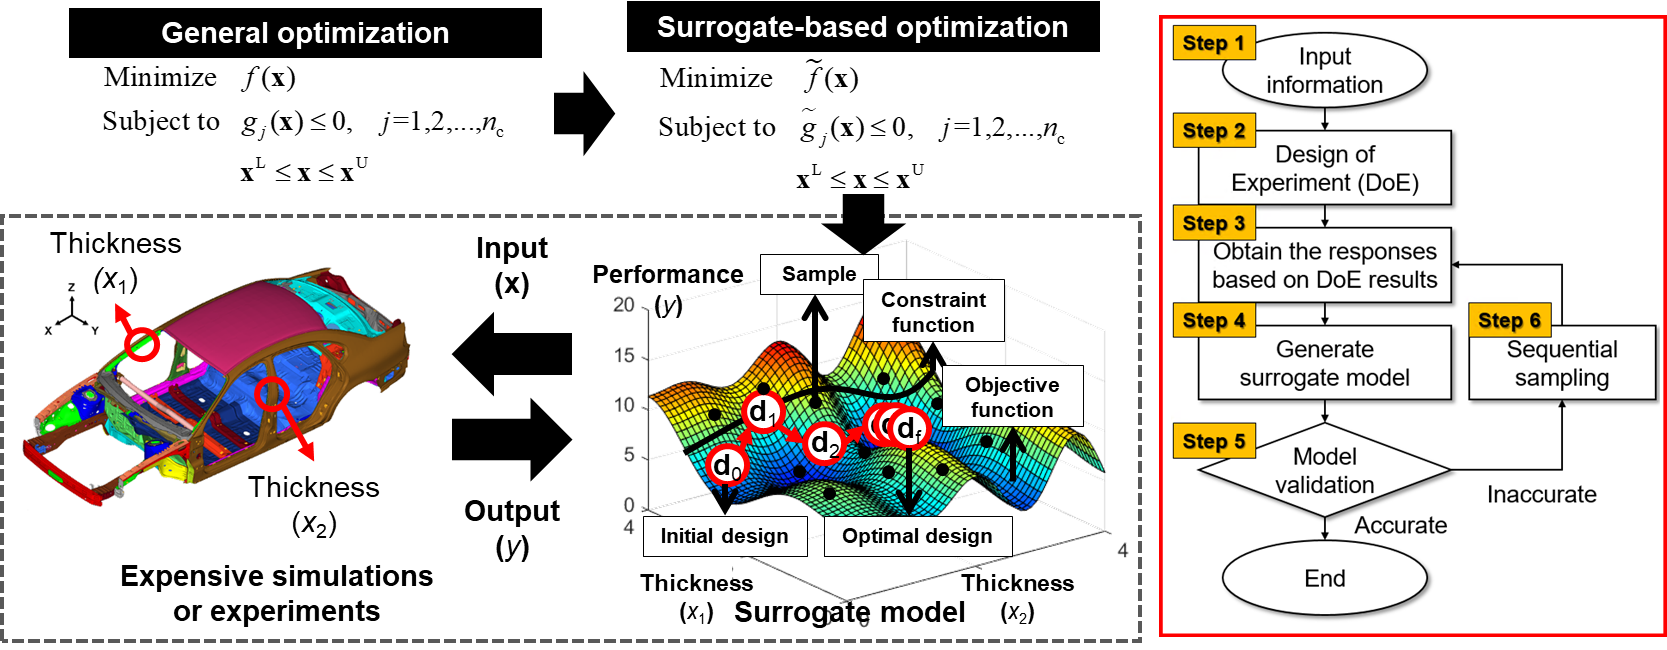

## **▣ 대리 모델이 만들어지는 일반적인 절차 (Step 4)**

**1) 실제 함수 모양을 가정한 basis 설정**
   - 이러한 basis는 일반적으로 Coefficient (or Parameter)의 함수로 표현
   - 즉, Coefficient (or Parameter)의 값에 따라 대리 모델의 모양이 변동
   - y = ax+b
   
**2) data 생성 및 추가**
   - 시뮬레이션 혹은 실험을 수행하여 데이터 확보
   - (x<sub>1</sub>, y<sub>1</sub>), (x<sub>2</sub>, y<sub>2</sub>), ..., (x<sub>n</sub>, y<sub>n</sub>)
   
**3) 최적화 수행하여 Coefficient (or Parameter) 유추**
   - 확보한 데이터를 기반으로 실제 함수를 잘 나타내는 파라미터를 최적화 과정을 통해 유추
   - a<sub>opt</sub>, b<sub>opt</sub>   

**4) 최적화된 Coefficient (or Parameter)를 이용하여 예측 모델 완성**
   - 최적화된 파라미터를 basis에 반영하여 대리 모델을 구성
   - y = a<sub>opt</sub>x+b<sub>opt</sub>
   
**※ 함수 모양을 어떻게 가정하는지 혹은 Coefficient (or Parameter)를 어떻게 유추하는지에 따라 방법론들의 분류가 가능**
   - y = ax+b, y = ax<sup>2</sup>+bx+c, y = sin(ax)+ax+b
   - 예측값과 실제값의 차이를 최소화, 현재 데이터가 표현 가능한 확률 최대화

### **◎ 가우시안 프로세스 모델**
* 공간간의 데이터간의 친밀도를 나타내는 커널 함수로 구성
* 커널 함수는 데이터간의 거리와 이를 조절하는 변수 $\theta$로 구성
* $\theta$가 구해야하는 파라미터

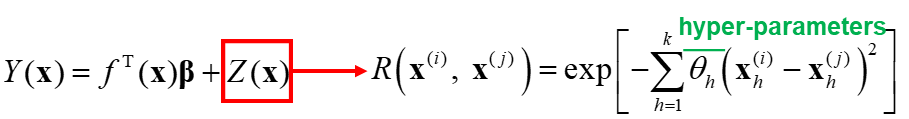

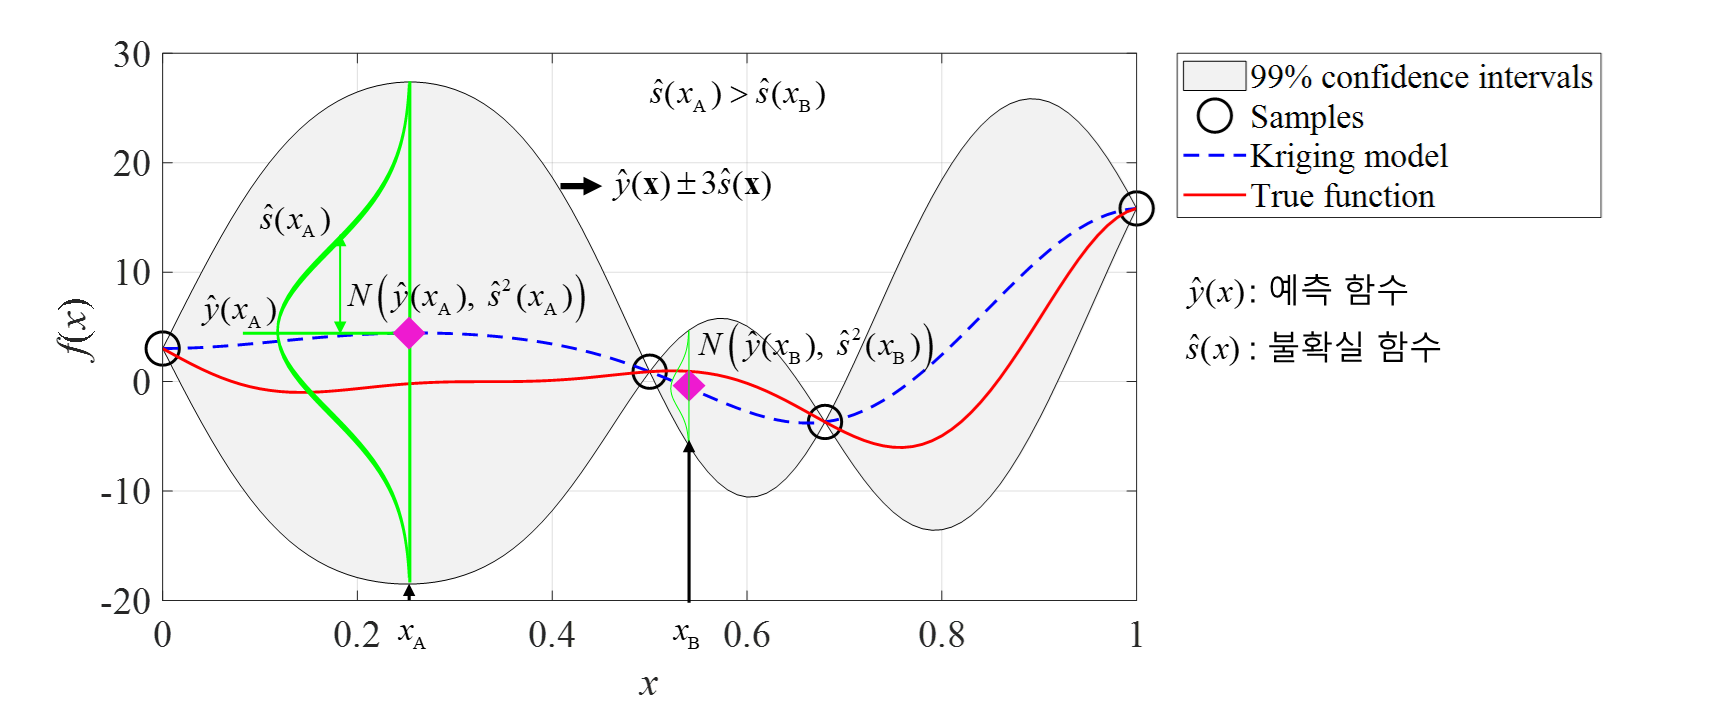

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [3]:
!pip install smt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 833.7/833.7 kB 10.0 MB/s eta 0:00:00


## **▣ 실습: One-dimensional Kriging example**

### ※ **예제 문제**
* 설계 공간: 0~1
* 근사하고자 하는 실제 함수: y = (6x - 2)<sup>2</sup> sin(12x - 4)
* 데이터: x=0, 0.4, 0.6, 1.0에서 입력 및 출력 값 존재
* Kriging으로 대리모델링을 수행


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from smt.surrogate_models import KRG

In [5]:
# 실험계획법 (DOE)
xt = np.array([0.0, 0.4, 0.6, 1.0]) # 입력 데이터

In [6]:
# 데이터 생성 (시뮬레이션 or 실험)
def HF_function(x): # high-fidelity function
    return ((6*x-2)**2)*np.sin((6*x-2)*2)
yt = HF_function(xt)

In [7]:
print("Input data",xt)
print("Output data",yt)

Input data [0.  0.4 0.6 1. ]
Output data [ 3.02720998  0.11477697 -0.14943781 15.82973195]


In [8]:
# 대리모델링 (Main process)
initial_theta = np.array([1e-2]) # 초기 하이퍼파라미터 설정
sm = KRG(theta0 = initial_theta)
sm.set_training_values(xt, yt) # 하이퍼파라미터 최적화
sm.train() # 하이퍼파라미터 최적화

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 4
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.1207809


In [9]:
print("initial theta values",  initial_theta)
print("optimal theta values",  sm.optimal_theta)

initial theta values [0.01]
optimal theta values [2.00489748]


___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting - done. Time (sec):  0.0024922
   
   Prediction time/pt. (sec) :  0.0000249
   


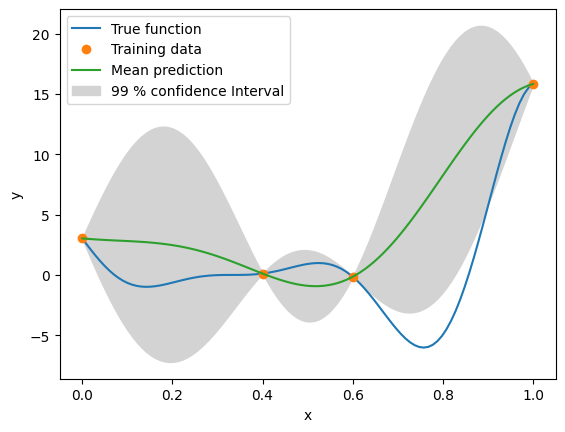

In [10]:
# 시각화 (Post-processing)
num = 100
x = np.linspace(0.0, 1.0, num) # 0에서 1까지 등간격으로 num개의 x값을 생성

y_true = HF_function(x)
# 예측값 및 불확실 정보
y_mean = sm.predict_values(x) # 예측값
s2 = sm.predict_variances(x) # 불확실 정보


# add a plot with variance
fig, axs = plt.subplots(1)
axs.plot(x, y_true)
axs.plot(xt, yt, "o")
axs.plot(x, y_mean)
axs.fill_between(
    np.ravel(x),
    np.ravel(y_mean - 3 * np.sqrt(s2)), # -3 시그마
    np.ravel(y_mean + 3 * np.sqrt(s2)), # +3 시그마
    color="lightgrey",
)
axs.set_xlabel("x")
axs.set_ylabel("y")
axs.legend(
    ["True function","Training data","Mean prediction","99 % confidence Interval"], # 3 시그마이므로 99 % 신뢰도 구간
    loc="best",
)
plt.show()